### 导包

In [1]:
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16 #keras应用程序是预训练好的深度学习模型，当模型初始化时权重会自动下载
import matplotlib.pyplot as plt
import numpy as np
import cv2

Using TensorFlow backend.


### 使用预训练好的权重在imagenet上预构建模型

In [2]:
model = VGG16(weights='imagenet',include_top=True)
#SGD + momentum：
#lr表示学习速率,
#momentum表示动量项，
#decay是学习速率的衰减系数(每个epoch衰减一次),
#nesterov的值是False或者True，表示使不使用nesterov momentum
sgd = SGD(lr=0.1,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy')

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553467904/553467096 [==============================] - 1219s 2us/step


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
import keras
import os 
from keras.utils import plot_model
os.environ["PATH"] += os.pathsep + 'F:/Python/Keras/Keras-Visualize/bin' #关联到Graphviz可执行文件的系统变量
print(os.pathsep)
print(os.environ["PATH"])
#模型可视化
plot_model(model,to_file='imgs/VGG16.png')

;
F:\Python\Anaconda3-4.2.0\setup\Library\bin;F:\Python\Anaconda3-4.2.0\setup\Library\bin;F:\Python\Anaconda3-4.2.0\setup\Scripts;F:\Python\Anaconda3-4.2.0\setup\Library\bin;C:\ProgramData\Oracle\Java\javapath;C:\Program Files\Java\jdk1.8.0_121\bin;C:\Program Files (x86)\Rational\common;C:\Program Files (x86)\Microsoft SQL Server\100\Tools\Binn\;C:\Program Files\Microsoft SQL Server\100\Tools\Binn\;C:\Program Files\Microsoft SQL Server\100\DTS\Binn\;C:\Program Files\MySQL\MySQL Utilities 1.6\;C:\Program Files\MySQL\MySQL Server 5.7\bin;C:\Program Files (x86)\Microsoft SQL Server\100\Tools\Binn\VSShell\Common7\IDE\;C:\Program Files (x86)\Microsoft SQL Server\100\DTS\Binn\;C:\Program Files\Java\jdk1.8.0_121\bin;D:\apache-tomcat-9.0.1\lib;D:\apache-tomcat-9.0.1\bin;D:\Python36;D:\Python36\Lib\idlelib;D:\redis;F:\JavaFrameWork\maven\apache-maven-3.5.3-bin\apache-maven-3.5.3\bin;D:\Python36\Scripts;C:\Windows\system32;C:\Windows;C:\Windows\system32\wbem;D:\apache-maven-3.5.2\bin;D:\git\Git\

### 图片调整为VGG16训练格式

In [6]:
im = cv2.resize(cv2.imread('input_imgs/cat2.jpg'),(224,224))
im = np.expand_dims(im,axis=0)
print(im.shape)

(1, 224, 224, 3)


### 预测

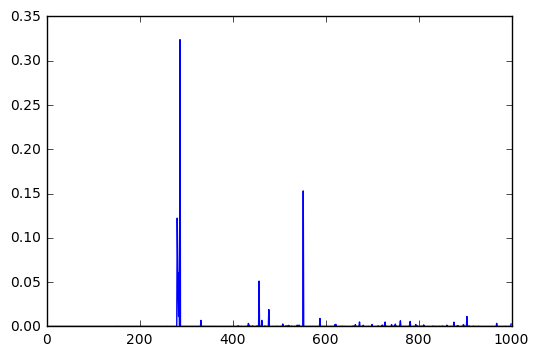

287


In [7]:
out = model.predict(im)
plt.plot(out.ravel()) #结果“摊平”成一维形式
plt.show()
print(np.argmax(out))